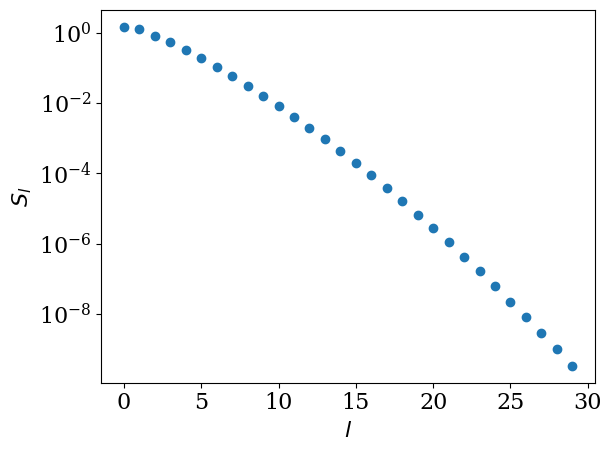

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sparse_ir

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 16,
})

lambda_ = 100
beta = 10
wmax = lambda_/beta
basis = sparse_ir.FiniteTempBasis('F', beta, wmax, eps=1e-10)

plt.semilogy(basis.s, marker='o', ls='')
plt.xlabel(r'$l$')
plt.ylabel(r'$S_l$')
plt.tight_layout()
plt.show()

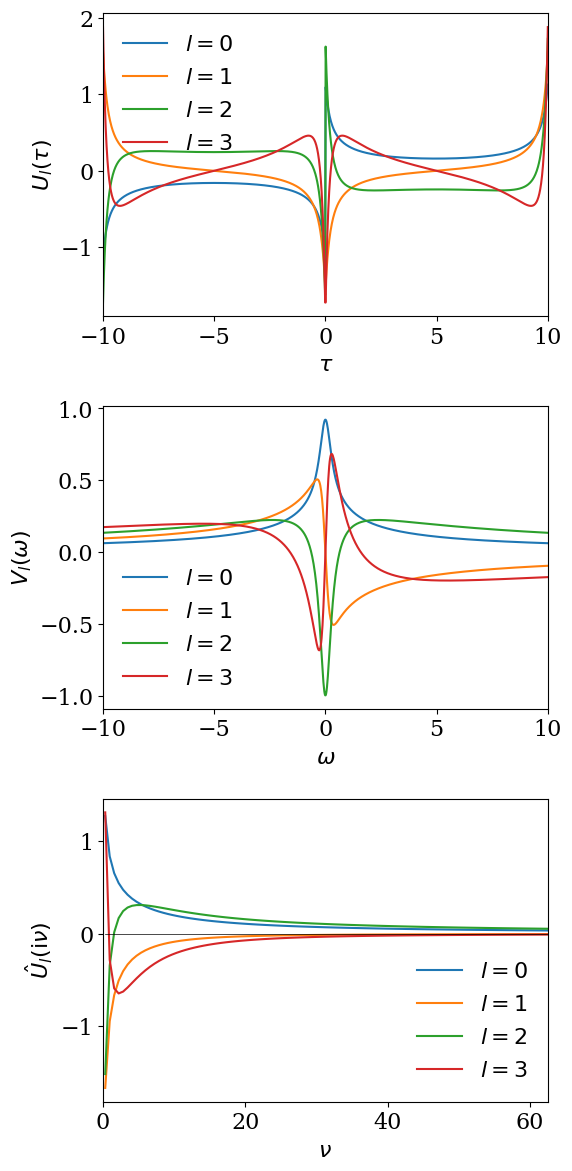

In [2]:
fig = plt.figure(figsize=(6,12))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
axes = [ax1, ax2, ax3]

taus = np.linspace(-beta, beta, 1000)
omegas = np.linspace(-wmax, wmax, 1000)

beta = 10
nmax = 100

v = 2*np.arange(nmax)+1
iv = 1J * (2*np.arange(nmax)+1) * np.pi/beta

uhat_val = basis.uhat(v)
for l in range(4):
    ax1.plot(taus, basis.u[l](taus), label=f'$l={l}$')
    ax2.plot(omegas, basis.v[l](omegas), label=f'$l={l}$')
    y = uhat_val[l,:].imag if l%2 == 0 else uhat_val[l,:].real
    ax3.plot(iv.imag, y, label=f'$l={l}$')

ax1.set_xlabel(r'$\tau$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$U_l(\tau)$')
ax2.set_ylabel(r'$V_l(\omega)$')
ax1.set_xlim([-beta, beta])
ax2.set_xlim([-wmax, wmax])

ax3.plot(iv.imag, np.zeros_like(iv.imag), ls='-', lw=0.5, color='k')
ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\hat{U}_l(\mathrm{i}\nu)$')
ax3.set_xlim([0, iv.imag.max()])

for ax in axes:
    ax.legend(loc='best', frameon=False)

plt.tight_layout()

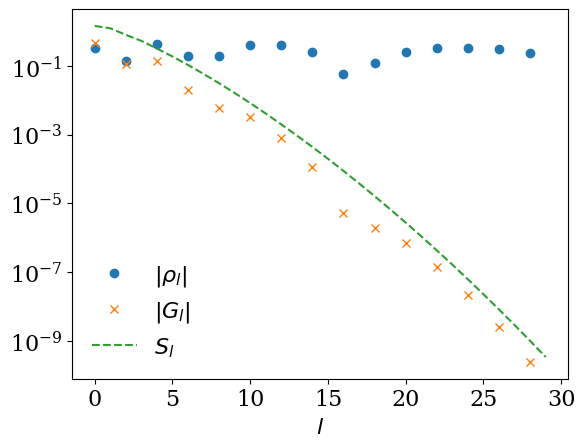

In [3]:
rho_l = 0.5 * (np.asarray(basis.v(1)) + np.asarray(basis.v(-1)))
gl = - basis.s * rho_l

ls = np.arange(basis.size)
plt.semilogy(ls[::2], np.abs(rho_l[::2]), label=r"$|\rho_l|$", marker="o", ls="")
plt.semilogy(ls[::2], np.abs(gl[::2]), label=r"$|G_l|$", marker="x", ls="")
plt.semilogy(ls, basis.s, label=r"$S_l$", marker="", ls="--")
plt.xlabel(r"$l$")
plt.legend(frameon=False)
plt.show()
#plt.savefig("plot.pdf")

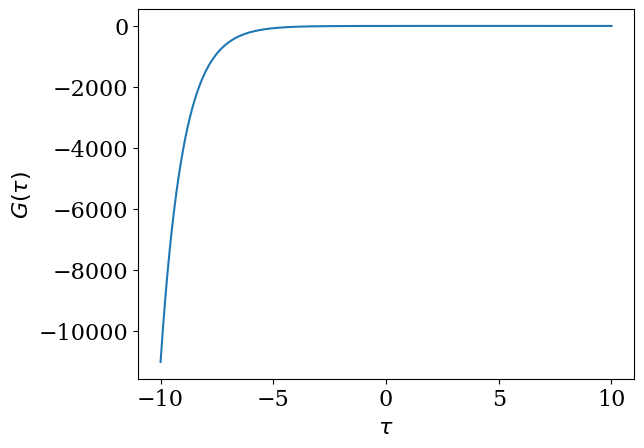

In [4]:
def gtau_exact(tau):
    return -0.5*(np.exp(-tau)/(1 + np.exp(-beta)) + np.exp(tau)/(1 + np.exp(beta)))

plt.plot(taus, gtau_exact(taus))
plt.xlabel(r"$\tau$")
plt.ylabel(r"$G(\tau)$")
plt.show()
#plt.savefig("gtau.pdf")

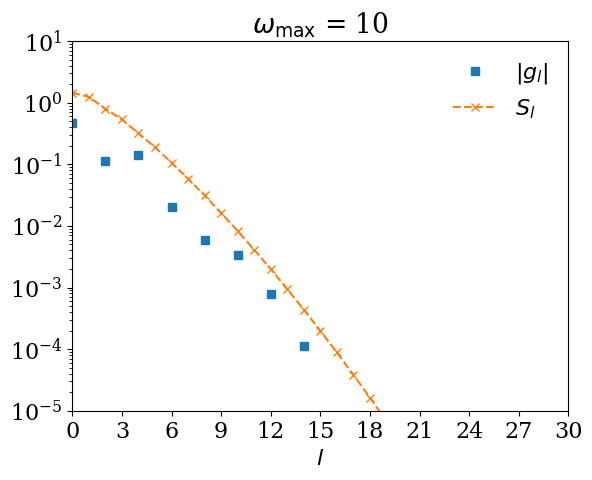

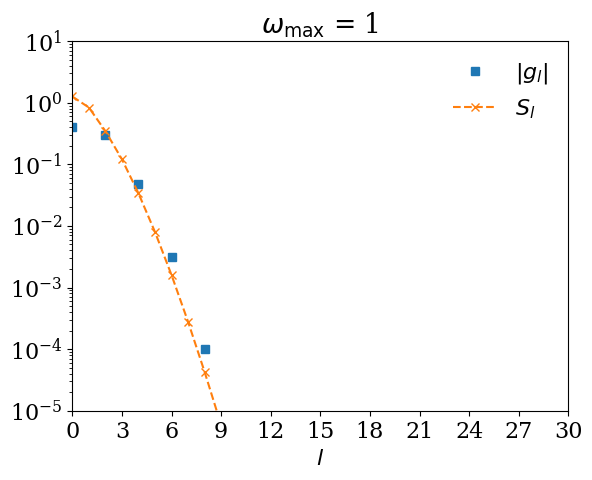

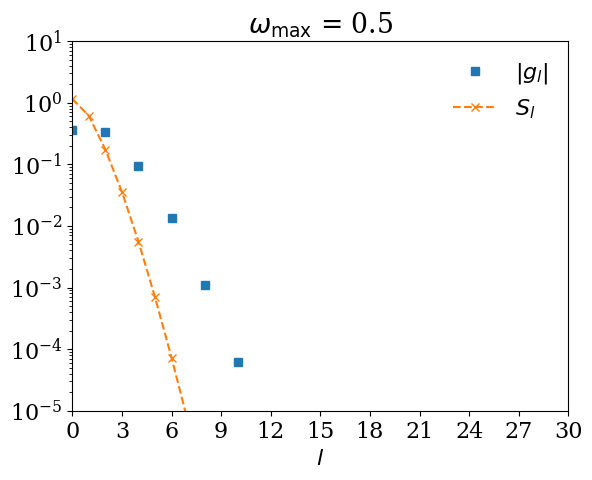

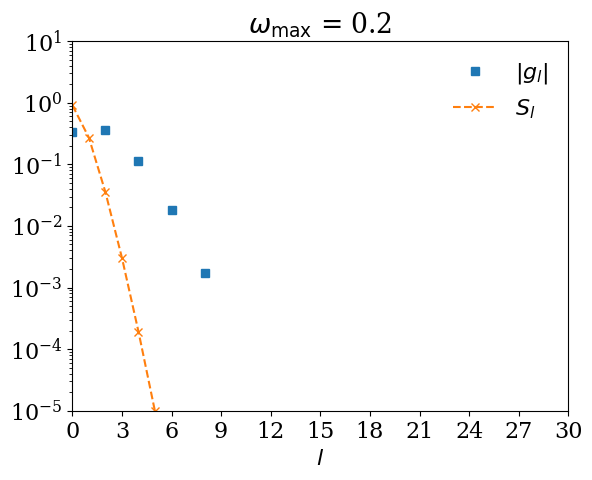

In [5]:
from scipy.integrate import quad
from matplotlib.ticker import MaxNLocator

for wmax_bad in [10, 1, 0.5, 0.2]:
    basis_bad = sparse_ir.FiniteTempBasis("F", beta, wmax_bad, eps=1e-10)

    # We expand G(τ).
    gl_bad = [quad(lambda x: gtau_exact(x) * basis_bad.u[l](x), 0, beta)[0] for l in range(basis_bad.size)]

    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Force xtics to be integer
    plt.semilogy(np.abs(gl_bad), marker="s", ls="", label=r"$|g_l|$")
    plt.semilogy(np.abs(basis_bad.s), marker="x", ls="--", label=r"$S_l$")
    plt.title(r"$\omega_\mathrm{max}$ = " + str(wmax_bad))
    plt.xlabel(r"$l$")
    plt.xlim([0, 30])
    plt.ylim([1e-5, 10])
    plt.legend(frameon=False)
    plt.show()
    #plt.savefig(f"coeff_bad_{wmax_bad}.pdf")